In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sweetviz as sv
import dtale

import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)

In [2]:
df_mrna_agilent_microarray_zscores_ref_all_samples = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR
    + "/data_mrna_agilent_microarray_zscores_ref_all_samples.txt",
    index_col=0,
).T
df_mrna_agilent_microarray_zscores_ref_all_samples

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,AK055082,BU687559,LIN52,PCOTH,GRM1,FXN,SLC9A1,PML,CR749394,CD164,DB337918,MOBKL2A,...,TMEM146,SLIT3-AS1,PSMC3IP,TEAD1,LOC253724,BM725158,GRHPR,EGLN2,TBC1D4,ANGPTL2,AF086457,AK124197,ENOX1,SBF2-AS1,VN1R4,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
Entrez_Gene_Id,473.0000,494470.0000,NaN,NaN,51533.0000,1149.0000,167153.0000,NaN,10786.0000,10993.0000,245973.0000,2152.0000,196472.0000,NaN,NaN,91750.0000,542767.0000,2911.0000,2395.0000,6548.0000,5371.0000,NaN,8763.0000,NaN,126308.0000,...,257062.0000,728095.0000,29893.0000,7003.0000,NaN,NaN,9380.0000,112398.0000,9882.0000,23452.0000,NaN,NaN,55068.0000,283104.0000,317703.0000,NaN,NaN,56886.0000,6944.0000,114788.0000,54862.0000,NaN,57549.0000,NaN,149647.0000
MB-0362,-0.7082,-0.4419,0.2236,-2.1485,-0.3220,0.0543,-0.7462,-0.4045,0.7777,0.9160,-0.5808,-1.5191,0.2585,-0.0796,0.1816,1.4376,1.0175,0.9104,-0.2199,1.0192,-0.9483,-0.6751,-1.3408,-0.0959,-0.3667,...,0.4216,-0.5590,1.3058,-0.6840,1.7994,-0.6761,0.5164,0.4045,-1.5430,0.9750,-1.8134,-0.7879,-0.0333,-0.9194,-0.8769,-0.8405,1.1698,0.1744,-0.2875,-0.5855,0.0174,-3.4444,0.4401,-1.0021,-1.1375
MB-0346,1.2179,0.4140,0.2255,0.4763,-1.0921,-1.1534,0.0709,0.5118,-0.5187,-0.5652,3.5623,-1.2817,-0.8272,0.6112,-2.4906,1.1396,-0.6209,0.1681,1.0549,-0.0917,-1.8145,-0.4628,-0.5084,-3.0496,0.0766,...,1.4024,1.7702,0.4575,1.7551,-0.0239,-1.2310,-1.2093,-2.2531,-0.2504,-1.0305,0.1139,-1.2068,-0.4856,0.1468,1.0622,1.5500,-0.1237,0.4005,0.3579,-0.4784,-0.7659,0.1327,1.2807,0.4464,0.0515
MB-0386,0.0168,-0.6843,0.5691,-0.2446,0.2830,2.9594,-0.6240,-0.3849,0.6866,0.1819,-0.2609,-1.0786,-1.4097,0.0153,-0.0040,0.4229,1.2352,-1.4790,-1.5410,-1.0407,-0.3869,0.3996,-1.4965,0.3667,-0.6944,...,0.1757,-1.4124,-0.5161,0.9144,1.2041,-0.5453,0.1296,0.2933,0.2985,0.8549,-1.3942,-0.7340,0.9402,-1.0213,0.3916,-1.2062,-1.0774,0.6514,0.4954,6.6421,0.0632,1.1914,0.8163,-1.1240,0.6751
MB-0574,-0.4248,-1.1139,0.3545,0.2618,-0.2864,-0.2218,2.0556,0.6358,-1.1241,-0.0056,-0.4389,-1.2038,0.8483,0.3354,0.7444,0.3647,0.4186,-0.4077,-0.7195,-0.7877,-1.1542,1.1061,-0.4268,1.5617,-0.5837,...,0.0108,0.3926,0.7332,-0.2774,0.4583,-1.6113,-0.1863,-0.4554,0.3418,-1.2431,1.2857,0.1978,1.0743,0.5237,-0.0742,-1.4270,0.8899,0.2843,0.2636,1.1931,0.2637,-0.7616,-0.1299,-2.2013,-0.3418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5465,-1.8702,3.2290,-0.0018,-2.5749,-0.9482,-0.7480,-0.9970,-0.7084,0.0308,0.2833,-0.1934,1.2837,-0.4106,-0.4820,-1.7826,-0.4859,-0.2490,0.0674,-0.2472,-1.2036,-0.1601,1.3636,0.7062,-2.1112,-1.1876,...,1.6727,-1.4227,-0.5773,-0.0026,0.4710,0.7010,0.7932,-1.0185,0.8814,2.2305,0.0055,-0.1866,-0.6142,-1.3124,-0.5349,-0.2990,0.0178,0.0864,-0.3993,0.2846,-0.2758,0.2825,0.4175,-0.2139,-0.2247
MB-5453,1.1299,1.3609,0.8035,-1.6314,-0.0397,-0.4148,0.6253,-1.4118,-0.3099,-1.1722,0.4617,2.4352,0.2030,0.7790,-0.5783,-0.4448,-0.3107,-1.0282,0.1994,0.3209,0.4179,0.1856,0.9997,0.2407,0.6163,...,1.7375,-0.2678,-1.1707,-0.0521,-3.0539,0.1652,0.8628,-0.7059,1.9747,0.9009,0.3021,-0.2035,-0.0119,-2.0083,-2.0344,0.2396,0.3383,-1.1329,-1.6279,0.1113,2.4660,-0.5914,0.3618,1.1136,0.5676
MB-5471,0.0481,0.6291,-0.6178,-0.8435,0.5491,0.0319,0.5801,-2.7479,-0.6955,-0.1561,-0.1289,-0.0617,-0.3420,0.4721,-0.2376,0.5692,-0.3053,0.1364,-0.1232,0.8127,0.1075,0.7548,-0.1385,-0.4198,0.1129,...,0.6734,0.1072,-0.1448,-0.0294,-0.8765,0.3312,-0.0474,-0.4350,-1.3171,0.6994,0.1903,-0.4201,-0.3919,-0.5882,0.0347,-0.0562,-0.5752,0.2625,-0.6451,0.1663,-0.8448,0.9188,0.8376,0.1193,-0.9348
MB-5127,-0.3357,0.2281,1.0327,-1.0429,-0.0115,-0.3778,2.2837,0.7290,0.6920,1.5252,-0.9357,-0.0227,-0.6633,0.9277,0.2648,-1.2347,-0.5733,-0.3878,-0.0776,-0.7574,0.0065,-0.8532,0.1282,-0.0044,0.6820,...,0.0946,-2.9034,1.5722,0.7369,-1.38

# 特徴量が重複していないか確認
遺伝子名が数多く存在するので、特徴量の名前に重複がないか確認する。

In [3]:
import collections

[
    k
    for k, v in collections.Counter(
        df_mrna_agilent_microarray_zscores_ref_all_samples.columns.tolist()
    ).items()
    if v > 1
]

['HERC2P9',
 'RPL7A',
 'RBMY1F',
 'MUC3A',
 'TP53TG3D',
 'RDH5',
 'TRDV2',
 'NIPAL1',
 'PCDHA@',
 'SMG1P5',
 'RIOK3',
 'SRR',
 'BOLA2',
 'CEP170',
 'SPAG8',
 'GNG10',
 'PPM1H',
 'NSUN5',
 'IGLL1',
 'CBWD1',
 'FCGR1A',
 'MAGED4B',
 'LINC00965',
 'RPL36',
 'ILKAP',
 'CD24',
 'HLA-DRB4',
 'SLC25A37',
 'DYNLRB1',
 'LINC00937',
 'BMS1P21',
 'PLAGL1',
 'RPAIN',
 'LSP1',
 'MRPL23',
 'LINC01089',
 'DMRTC1B',
 'LINC00869',
 'RPL13A',
 'RPL5',
 'OTUD7A',
 'SBDS',
 'INTS4',
 'SRGAP2',
 'MS4A18',
 'PIN4',
 'XG',
 'PCSK6',
 'CORT',
 'CEP164',
 'RPL37',
 'AFAP1',
 'FAM163B',
 'CLK2',
 'BMS1',
 'SNRPN',
 'BIRC5',
 'IGSF9B',
 'RPL4',
 'CTTNBP2NL',
 'WASH3P',
 'LINC01128',
 'BMS1P4',
 'PMS2P1',
 'MZT2A',
 'RFFL',
 'P2RX5',
 'FAM153A',
 'CYP2D6',
 'SLX1A',
 'NBPF1',
 'AIDA',
 'OR1D5',
 'MRPL45P2',
 'CSPG4P5',
 'FAM230A',
 'ELMOD1',
 'PPT2',
 'DDX17',
 'NME1',
 'RPL39',
 'RPL13',
 'LIMS3',
 'CES5A',
 'TSPY1',
 'NNT',
 'DND1',
 'GOLGA6L5P',
 'MT1E',
 'STAG3',
 'DEPDC4',
 'YWHAE',
 'TNRC18',
 'UBE2V1',
 'O

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


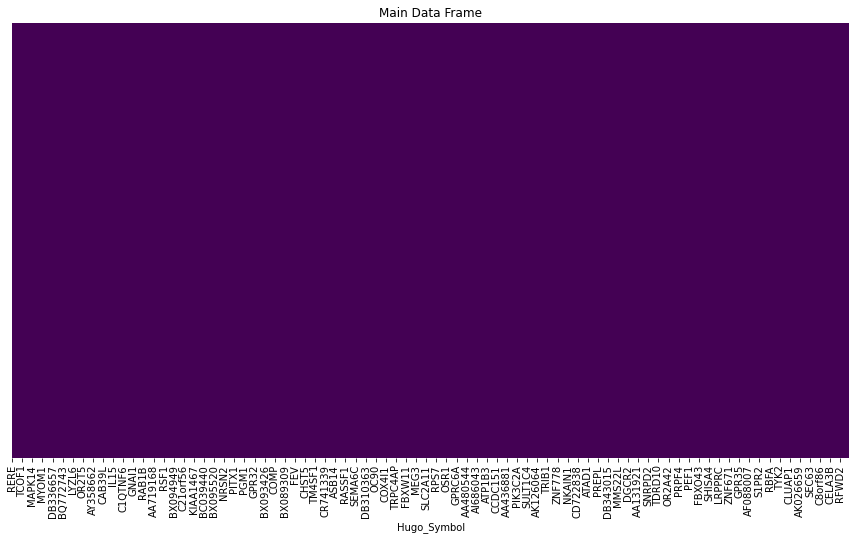

In [7]:
# Visualization of missing data
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(
    df_mrna_agilent_microarray_zscores_ref_all_samples.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="viridis",
)
ax.set_title("Main Data Frame")
plt.show();